In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n=100, ro=2):
    x1 = np.random.multivariate_normal(mean=[0,0], cov=np.identity(2),size=n)
    x2 = np.random.multivariate_normal(mean=[ro,ro], cov=np.identity(2),size=n)
    y1 = np.array([1 for i in range(n)])
    y2 = np.array([-1 for i in range(n)])
    y = np.concatenate((y1,y2))
    x = np.concatenate((x1,x2))
    idx = np.random.permutation(2*n)
    x = x[idx,:]
    y = y[idx]
    return x,y

def sgn(x):
    return x / abs(x)

def accuracy(y, y_hat):
    return sum(y == y_hat)/len(y)

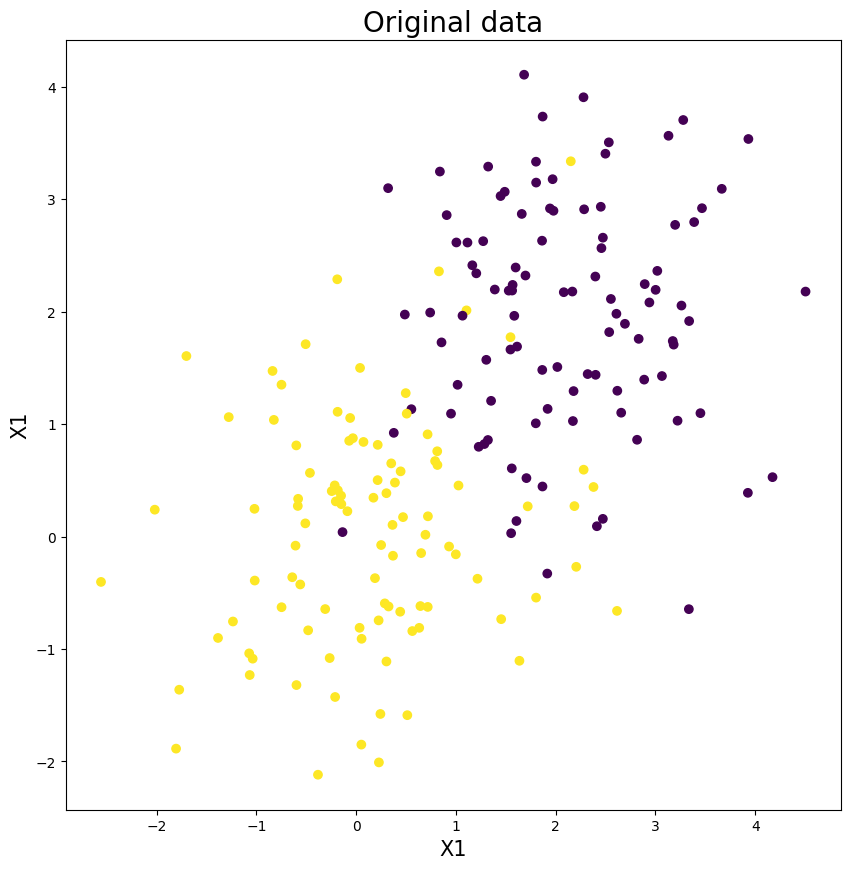

In [7]:
x,y = generate_data(ro=2)

plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel("X1", fontsize=15)
plt.ylabel("X1", fontsize=15)
plt.title("Original data", fontsize=20)
plt.show()

In [8]:
np.column_stack((x, np.ones(200))) # adding ones

array([[ 2.37892897,  0.44060696,  1.        ],
       [-0.03294544,  0.8746973 ,  1.        ],
       [ 0.65143518, -0.14720884,  1.        ],
       [-0.14863997,  0.28802947,  1.        ],
       [ 2.61769133,  1.29646171,  1.        ],
       [-0.59846021, -1.32105066,  1.        ],
       [-1.80507761, -1.88642204,  1.        ],
       [ 3.27819617,  3.7044928 ,  1.        ],
       [ 2.60845722,  1.98126013,  1.        ],
       [ 1.54717231,  1.7729394 ,  1.        ],
       [ 2.32044647,  1.44492288,  1.        ],
       [-1.06672078, -1.23170939,  1.        ],
       [ 0.64394723, -0.61844433,  1.        ],
       [ 3.45058737,  1.09726778,  1.        ],
       [ 0.32496491, -0.62203996,  1.        ],
       [ 0.85554044,  1.72669981,  1.        ],
       [ 3.92613126,  0.38870402,  1.        ],
       [ 1.63655428, -1.10512618,  1.        ],
       [ 2.40010304,  1.43819134,  1.        ],
       [ 4.50428154,  2.17862758,  1.        ],
       [ 1.68338565,  4.10728785,  1.   

In [9]:
from Algorithm import CoordinateDescent

from scipy.sparse import csc_matrix

cd = CoordinateDescent(C=2)
cd.fit(csc_matrix(np.column_stack((x, np.ones(200)))),y)

TypeError: matrix is not square

In [4]:
w = cd.process()

In [5]:
w # the last one is the bias

array([-0.88873191, -0.73019682,  1.52104846])

In [7]:
y_hat = (w[0:-1] @ x.T) + w[-1]
y_hat = sgn(y_hat)

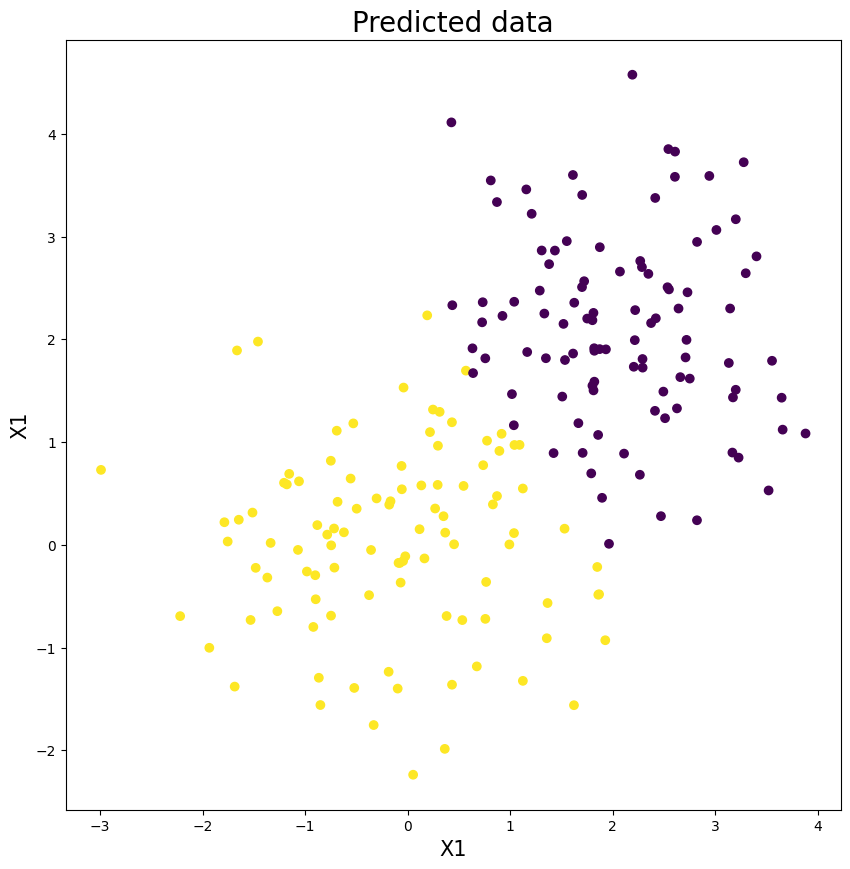

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=y_hat)
plt.xlabel("X1", fontsize=15)
plt.ylabel("X1", fontsize=15)
plt.title("Predicted data", fontsize=20)
plt.show()

In [9]:
accuracy(y, y_hat)

0.94